In [15]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Functions

In [16]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    txt = re.sub('\r\n', '', txt)
    txt = re.sub('amp', '', txt) # removing ampersand
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [17]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'data']
    txt_lst = [word for word in txt_lst if word != 'privacy']
    txt_lst = [word for word in txt_lst if word != 'u']
    return " ".join(txt_lst)

In [46]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(desc_vec)
    return estimator_kmeans.inertia_

In [19]:
!pip install pycountry

In [20]:
!pip install pycountry
def findCountry(txt):
    loc = []
    for c in pycountry.countries:
        if c.name in txt:
            return c.name
        elif txt != 'global':
            return 'Unknown'

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent = "geoapiExercises")
geocode = RateLimiter(geolocator.geocode, max_retries=10000, swallow_exceptions=True, return_value_on_exception=None)
def findCountry(txt):
    if txt is np.nan:
        return 'Unknown'
    if txt.lower() == 'global': # maybe not needed
        return 'Global'
    try:
        x = geolocator.geocode(txt, )
        if x is None:
            return 'Unknown'
        loc = x.address.split(',')[-1]
        if loc[0] == " ":
            loc = loc[1:]
        return loc
    except:
        return 'Unknown'

In [21]:
def cluster_summary(ci, df):
    cluster = df[df.cluster_id==ci]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    return cluster_summary

In [22]:
# we can make a function that puts comparisons side by side so its easier for us to see in a data frame 

def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id, df2))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [23]:
def kmeans_cluster(df, n_clusters=2):
    """This function assigns clusters to every row in the dataframe via kmeans"""
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [24]:
def graph_summary_clustering(results):
    """this function produces a summary of the clusters"""
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

# Data Privacy Tweets

In [25]:
data = pd.read_csv('data_privacy_tweets.csv')

In [26]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1166589525386301440,x1404485195676459008,2021-06-14 17:05:39,privacy_issues,"The @EFF finds that the proposed modifications to the HIPAA would ""invade your most personal and intimiate health data."" \r\n\r\nStating that trust in healthcare is crucial and especially so during the #COVID pandemic.\r\n\r\nRead more: https://t.co/ReuoQ3mF9p",TweetDeck,248,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/1166589525386301440/1570786848,NaN,http://pbs.twimg.com/profile_images/1166589644068331521/SU2CytKK_normal.png
1,x1166589525386301440,x1403010409473449986,2021-06-10 15:25:22,privacy_issues,The European Parliament passes the new #EU #COVID19 Certificate Regulation detailing peoples' COVID information.\r\n\r\nPromising that all personal data will be processed in line with the #GDPR\r\n\r\nRead more: https://t.co/8PGuChsV5F,TweetDeck,223,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/1166589525386301440/1570786848,NaN,http://pbs.twimg.com/profile_images/1166589644068331521/SU2CytKK_normal.png
2,x1166589525386301440,x1404185087093182465,2021-06-13 21:13:07,privacy_issues,"To gain better control over the increasingly powerful technology sector in #China, new regulations in China make it harder for big tech to refuse the government's request for #datasharing. \r\n\r\n#datasecurity\r\n\r\nRead more: https://t.co/piSfs3NW4J",TweetDeck,240,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/1166589525386301440/1570786848,NaN,http://pbs.twimg.com/profile_images/1166589644068331521/SU2CytKK_normal.png
3,x1166589525386301440,x1401833811940306947,2021-06-07 09:30:00,privacy_issues,What if the consumers are on the driving seat to agree or disagree to the #privacypolicy of the #tech giants? Article by Beth Magnuson\r\nexplains #DataPrivacy &amp; #innovation on @VentureBeat \r\n\r\nhttps://t.co/n2pFOwWSmi\r\n\r\n#PrivacyTech #Technology #DataPrivacy,TweetDeck,255,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/1166589525386301440/1570786848,NaN,http://pbs.twimg.com/profile_images/1166589644068331521/SU2CytKK_normal.png
4,x1166589525386301440,x1401555697163280387,2021-06-06 15:04:52,privacy_issues,"""Vera Jourová says new rules are needed to limit the bulk collection of Europeans’ data.""\r\n\r\nThe #EU is requiring new legislation limiting #US government agencies from accessing European data. \r\n\r\nRead more at: https://t.co/04avhPjhCd",TweetDeck,230,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/1166589525386301440/1570786848,NaN,http://pbs.twimg.com/profile_images/1166589644068331521/SU2CytKK_normal.png


In [27]:
data.user_id.nunique()
# we hvae 7243 unique users here

7243

In [28]:
data.shape

(10637, 90)

# Identifying Columns
## Cleaning Data

In [29]:
ident = data[["verified", "lang", "location", "followers_count", "description", "user_id"]] # can always change later
ident = ident.drop_duplicates()

In [30]:
ident = ident.dropna()
ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,EU,406,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.,x1166589525386301440
6,False,en,Singapore,64,"Gamer, Security and Privacy Blogger, author @bestvpnguru",x1037366296122413063
21,False,en,United States of America,2228,Global Counterespionage Specialists | Cyber TSCM,x14569114
25,False,en,"Los Gatos, California",1009,"4Thought Marketing specializes in offering custom solutions designed to enhance @Eloqua, including Integrations, Custom Programs, and Strategic Consulting.",x131236988
28,False,en,"Loveland, CO",537,"Personal account - nothing here is the opinion of my employer. Staff Engineer at Liqid, Inc.",x25927802


In [31]:
ident['description'] = ident['description'].apply(cleanTxt)

ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,EU,406,bimonthly newsletter on privacy design product technology more by miranovatweet the team we are open for collabs all info via dm,x1166589525386301440
6,False,en,Singapore,64,gamer security and privacy blogger author bestvpnguru,x1037366296122413063
21,False,en,United States of America,2228,global counterespionage specialists cyber tscm,x14569114
25,False,en,"Los Gatos, California",1009,4thought marketing specializes in offering custom solutions designed to enhance eloqua including integrations custom programs and strategic consulting,x131236988
28,False,en,"Loveland, CO",537,personal account nothing here is the opinion of my employer staff engineer at liqid inc,x25927802


In [34]:
'''bug here - potentially caused by the wordcloud because it also uses the stopwords
(solved by moving the word cloud section to the end but would show up again if run it now) -Shuwen'''
wnet = WordNetLemmatizer()
ident['description'] = ident['description'].apply(stopWords)

In [35]:
desc = ident[['description']]
desc.head()

,description
0,bimonthly newsletter design product technology miranovatweet team open collabs info via dm
6,gamer security blogger author bestvpnguru
21,global counterespionage specialist cyber tscm
25,4thought marketing specializes offering custom solution designed enhance eloqua including integration custom program strategic consulting
28,personal account nothing opinion employer staff engineer liqid inc


In [36]:
desc_lst = []
for row in desc['description']:
    desc_lst.append(row)

desc_lst[:5] # need to make into a list so the vectorizer will work

['bimonthly newsletter design product technology miranovatweet team open collabs info via dm',
 'gamer security blogger author bestvpnguru',
 'global counterespionage specialist cyber tscm',
 '4thought marketing specializes offering custom solution designed enhance eloqua including integration custom program strategic consulting',
 'personal account nothing opinion employer staff engineer liqid inc']

In [40]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

desc_vec = pd.DataFrame(tv.fit_transform(desc_lst).toarray(), columns = tv.get_feature_names())
desc_vec.head()

,00,001,003u0001f4e9,01,01257,01524,01772,01865,01912790228,02,...,électrique,électronique,éliminer,étudiant,éxito,êtes,être,òtító,öh,örebro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Making List of Words

In [41]:
desc_words = []

for row in desc['description']:
    for word in str(row).split(" "):
        desc_words.append(word)
        
desc_words[:5]

['bimonthly', 'newsletter', 'design', 'product', 'technology']

In [42]:
from nltk.probability import FreqDist
fdist_desc = FreqDist()
for word in desc_words:
    fdist_desc[word]+=1
fdist_desc

FreqDist({'news': 467, 'tech': 371, 'digital': 357, 'business': 335, 'technology': 328, 'security': 313, 'tweet': 271, 'marketing': 237, 'medium': 205, 'service': 195, ...})

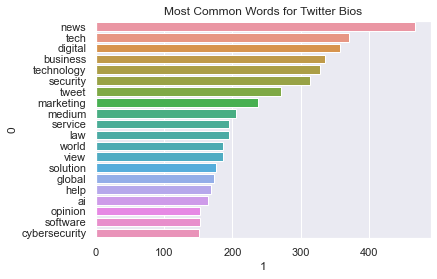

In [43]:
freq_data_desc = pd.DataFrame.from_dict(fdist_desc.most_common(20))
rel = sns.barplot(data = freq_data_desc, x = 1, y = 0).set(title='Most Common Words for Twitter Bios')


In [44]:
most_common_desc = []

for key in fdist_desc.most_common(20):
    most_common_desc.append(key[0])
    
most_common_desc

['news',
 'tech',
 'digital',
 'business',
 'technology',
 'security',
 'tweet',
 'marketing',
 'medium',
 'service',
 'law',
 'world',
 'view',
 'solution',
 'global',
 'help',
 'ai',
 'opinion',
 'software',
 'cybersecurity']

## Clustering by description
### This helps us identify the different kinds of accounts that are tweeting about this topic.

In [49]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
CPU times: user 6min 7s, sys: 44.8 s, total: 6min 52s
Wall time: 1min 40s


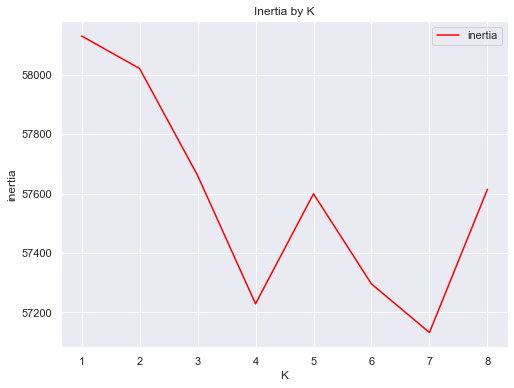

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

#I would go with 6 - Shuwen

### Cluster Analysis

In [89]:
estimator_kmeans = KMeans(random_state=42, n_clusters=6)

estimator_kmeans.fit(desc_vec)

KMeans(n_clusters=6, random_state=42)

In [90]:
desc_vec["cluster_id"] = estimator_kmeans.labels_
desc_vec.head()

,00,001,003u0001f4e9,01,01257,01524,01772,01865,01912790228,02,...,électronique,éliminer,étudiant,éxito,êtes,être,òtító,öh,örebro,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [91]:
desc_clusters = desc_vec.groupby('cluster_id').sum()
desc_clusters.head()

,00,001,003u0001f4e9,01,01257,01524,01772,01865,01912790228,02,...,électrique,électronique,éliminer,étudiant,éxito,êtes,être,òtító,öh,örebro
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
desc_clusters_20 = desc_clusters[['news',
 'tech',
 'digital',
 'business',
 'technology',
 'security',
 'tweet',
 'marketing',
 'medium',
 'service',
 'law',
 'world',
 'view',
 'solution',
 'global',
 'help',
 'ai',
 'opinion',
 'software',
 'cybersecurity']]

desc_clusters_20

#Interestingly we seem to get different words as the top 20. A few words are different and caused a key error. - Shuwen

,news,tech,digital,business,technology,security,tweet,marketing,medium,service,law,world,view,solution,global,help,ai,opinion,software,cybersecurity
cluster_id,,,,,,,,,,,,,,,,,,,,
0,372.0,52.0,19.0,40.0,46.0,9.0,31.0,22.0,25.0,5.0,12.0,29.0,1.0,1.0,18.0,4.0,16.0,144.0,11.0,15.0
1,12.0,266.0,281.0,248.0,234.0,0.0,166.0,188.0,150.0,149.0,136.0,140.0,166.0,152.0,133.0,124.0,131.0,6.0,99.0,98.0
2,19.0,17.0,10.0,16.0,22.0,262.0,10.0,4.0,3.0,25.0,12.0,9.0,10.0,18.0,16.0,8.0,10.0,0.0,9.0,27.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
5,0.0,16.0,9.0,5.0,13.0,4.0,3.0,1.0,6.0,2.0,3.0,5.0,6.0,1.0,2.0,1.0,3.0,1.0,22.0,2.0


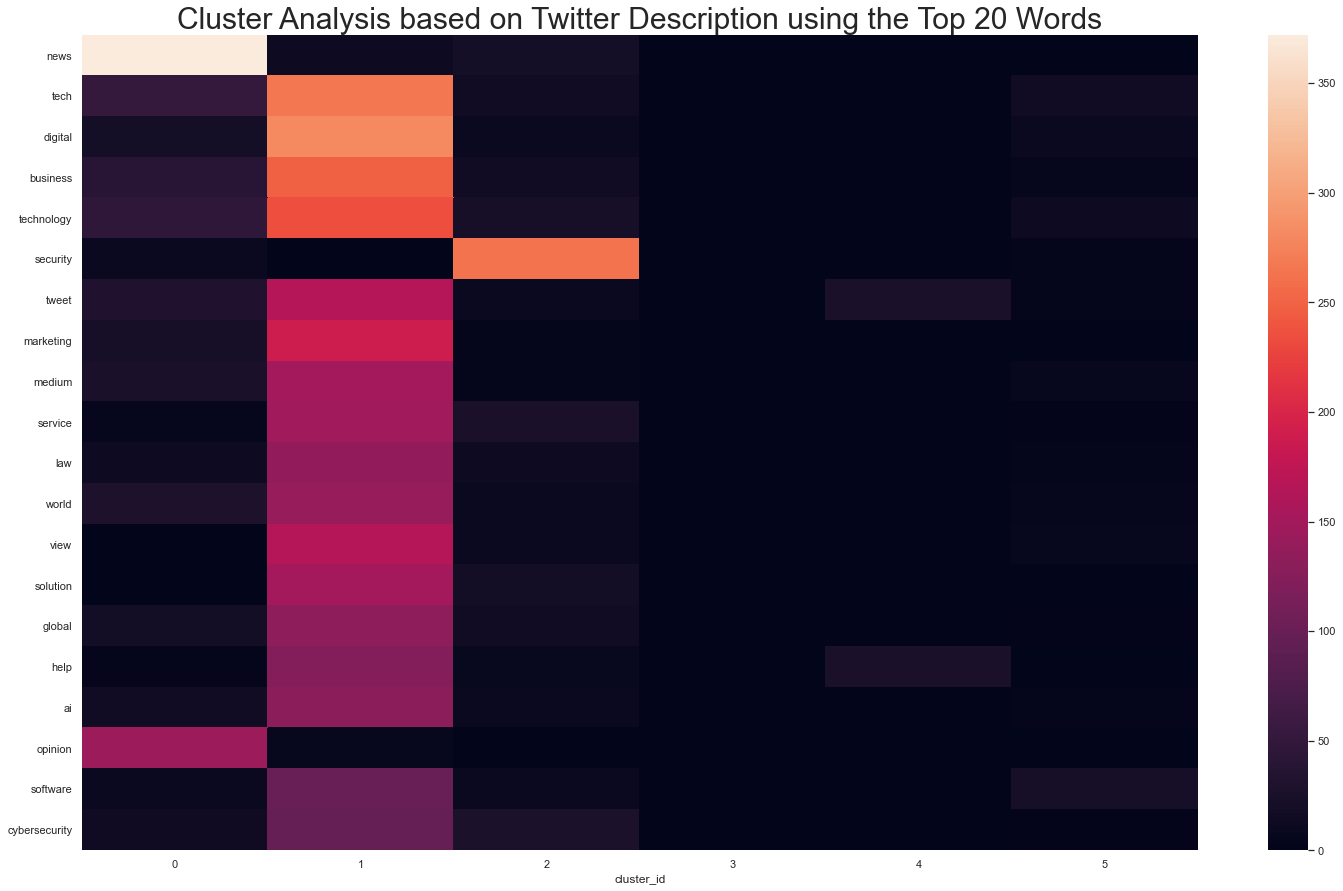

In [93]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(desc_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Description using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Clustering on other columns

In [71]:
# what if we cluster on the other columns *including* the descrtiption? - Mary
df2 = data[["created_at", "is_quote", "retweet_count", "location", "followers_count", "friends_count", "listed_count", "account_created_at", "verified"]][:3000]
df2.head() # remove is_retweet and protected, no variance

,created_at,is_quote,retweet_count,location,followers_count,friends_count,listed_count,account_created_at,verified
0,2021-06-14 17:05:39,False,0,EU,406,434,14,2019-08-28 05:53:33,False
1,2021-06-10 15:25:22,False,0,EU,406,434,14,2019-08-28 05:53:33,False
2,2021-06-13 21:13:07,False,0,EU,406,434,14,2019-08-28 05:53:33,False
3,2021-06-07 09:30:00,False,1,EU,406,434,14,2019-08-28 05:53:33,False
4,2021-06-06 15:04:52,False,1,EU,406,434,14,2019-08-28 05:53:33,False


In [72]:
#saving only the time
from datetime import datetime, date
df2[["created_at"]] = df2[["created_at"]].apply(pd.to_datetime)

In [73]:
#df2['day_post_created'] = pd.DatetimeIndex(df2["created_at"]).day
#getting only year of when the account was created
# our model is relying a lot on day_post_created. I don't believe it tells us much
# so I am getting rid of it for now and seeing what happens
df2['year_account_created'] = pd.DatetimeIndex(df2["account_created_at"]).year
df2 = df2.drop(["created_at", "account_created_at"], axis=1)
df2['year_account_created'] = df2["year_account_created"].astype("category")
df2.head()

,is_quote,retweet_count,location,followers_count,friends_count,listed_count,verified,year_account_created
0,False,0,EU,406,434,14,False,2019
1,False,0,EU,406,434,14,False,2019
2,False,0,EU,406,434,14,False,2019
3,False,1,EU,406,434,14,False,2019
4,False,1,EU,406,434,14,False,2019


In [74]:
# omit country for now since country function isn't optimized
# %%time
# df2['country'] = df2['location'].apply(findCountry)
# df2.head() 
# finding country for location (takes 8 minutes for 1000 rows, 18 mins for 3000)
#get a timeout error - Shuwen 
# elyse mentioned that she had to split it into different rows. I think we'll figure it out later. - Mary

In [75]:
df2 = df2.drop('location', axis = 1)

In [76]:
numerical_data = df2.select_dtypes(np.number)
categorical_data = df2.drop(numerical_data, axis = 1)

### Processing Data

In [77]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
    numerical_data_normalized,
    columns=numerical_data.columns) 

numerical_data_normalized.head()

,retweet_count,followers_count,friends_count,listed_count
0,0.000000,0.000061,0.004313,0.000381
1,0.000000,0.000061,0.004313,0.000381
2,0.000000,0.000061,0.004313,0.000381
3,0.003891,0.000061,0.004313,0.000381
4,0.003891,0.000061,0.004313,0.000381


In [78]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True,
                                    dtype="int64"
).reset_index()
categorical_data_codified.head()

,index,is_quote,verified,year_account_created_2007,year_account_created_2008,year_account_created_2009,year_account_created_2010,year_account_created_2011,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
0,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [79]:
categorical_data_codified = categorical_data_codified.drop('index', axis = 1)


In [80]:
df2_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
).reset_index()

In [81]:
df2_processed = df2_processed.drop('index', axis = 1)


In [82]:
df2_processed.head()


,retweet_count,followers_count,friends_count,listed_count,is_quote,verified,year_account_created_2007,year_account_created_2008,year_account_created_2009,year_account_created_2010,...,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
0,0.000000,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.003891,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.003891,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Finding K

In [91]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 35]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
running Kmeans with k=35
CPU times: user 44min 17s, sys: 3min 53s, total: 48min 10s
Wall time: 16min 3s


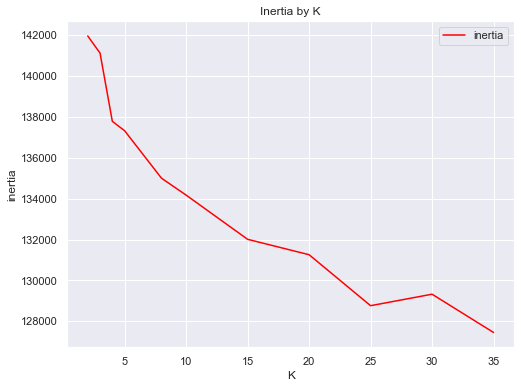

In [92]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [93]:
estimator_kmeans = KMeans(random_state=42, n_clusters=15) 
estimator_kmeans.fit(df2_processed)

KMeans(n_clusters=15, random_state=42)

In [94]:
df2["cluster_id"] = estimator_kmeans.labels_
df2.head()

,is_quote,retweet_count,followers_count,friends_count,listed_count,verified,year_account_created,cluster_id
0,False,0,406,434,14,False,2019,10
1,False,0,406,434,14,False,2019,10
2,False,0,406,434,14,False,2019,10
3,False,1,406,434,14,False,2019,10
4,False,1,406,434,14,False,2019,10


In [95]:
df2.cluster_id.value_counts()

1     438
3     353
6     323
4     236
8     208
11    202
7     196
5     184
9     135
0     131
10    125
13    124
12    120
14    118
2     107
Name: cluster_id, dtype: int64

In [96]:
cluster_summary(1, df2)

{'is_quote': 0.01141552511415525,
 'verified': 0.04337899543378995,
 'year_account_created': 2012,
 'retweet_count': 0.4680365296803653,
 'followers_count': 43241.19406392694,
 'friends_count': 1067.5753424657535,
 'listed_count': 125.8310502283105,
 'cluster_id': 1.0}

In [97]:
cluster_comparison(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
is_quote,0.007634,0.011416,0.009346,0.028329,0.012712,0.038043,0.021672,0.020408,0.000000,0.037037,0.064,0.039604,0.041667,0.008065,0.101695
verified,0.404580,0.043379,1.000000,0.062323,0.025424,0.108696,0.000000,0.045918,0.000000,0.000000,0.056,0.059406,0.016667,0.080645,0.042373
year_account_created,2008.000000,2012.000000,2009.000000,2010.000000,2017.000000,2011.000000,2009.000000,2020.000000,2021.000000,2018.000000,2019.000,2016.000000,2014.000000,2015.000000,2013.000000
retweet_count,8.221374,0.468037,1.803738,1.617564,1.334746,2.342391,0.761610,0.816327,1.831731,1.177778,1.688,0.821782,0.666667,1.677419,0.889831
followers_count,590434.419847,43241.194064,456734.336449,27786.900850,5855.237288,147138.353261,5113.950464,1635.117347,229.937500,1626.370370,1956.480,18706.712871,7662.900000,81885.008065,11083.889831
friends_count,1539.824427,1067.575342,2020.000000,19104.835694,2004.381356,2800.983696,2359.585139,446.326531,244.052885,780.881481,721.288,1358.569307,5411.733333,5737.911290,8381.516949
listed_count,3176.213740,125.831050,2830.345794,1215.181303,91.961864,1757.614130,316.684211,4.127551,0.730769,20.933333,13.952,358.123762,233.900000,536.653226,343.008475


In [60]:
kmeans_cluster?


In [98]:
cluster_results = kmeans_cluster(df2_processed, 10)
cluster_summary2 = graph_summary_clustering(cluster_results)

In [99]:
#cluster_summary2 = cluster_summary2.drop('cluster_id', axis = 1)
cluster_summary2

,followers_count,friends_count,is_quote,listed_count,retweet_count,verified,year_account_created_2007,year_account_created_2008,year_account_created_2009,year_account_created_2010,...,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000873,0.019919,0.012712,0.002501,0.005194,0.025424,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0
1,0.004144,0.189862,0.028329,0.033046,0.006294,0.062323,0.000000,0.000000,0.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.014682,0.022785,0.019370,0.017633,0.003740,0.217918,0.000000,0.000000,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.000244,0.004436,0.020408,0.000112,0.003176,0.045918,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0
4,0.006449,0.010609,0.011416,0.003422,0.001821,0.043379,0.000000,0.000000,0.0,0.0,...,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
5,0.000034,0.002425,0.000000,0.000020,0.007127,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0
6,0.078870,0.013780,0.005435,0.084489,0.024319,0.576087,0.081522,0.711957,0.0,0.0,...,0.0,0.027174,0.010870,0.054348,0.065217,0.0,0.0,0.038043,0.0,0.0
7,0.000243,0.007760,0.037037,0.000569,0.004583,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0
8,0.021946,0.027836,0.038043,0.047798,0.009114,0.108696,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


<AxesSubplot:xlabel='Cluster'>

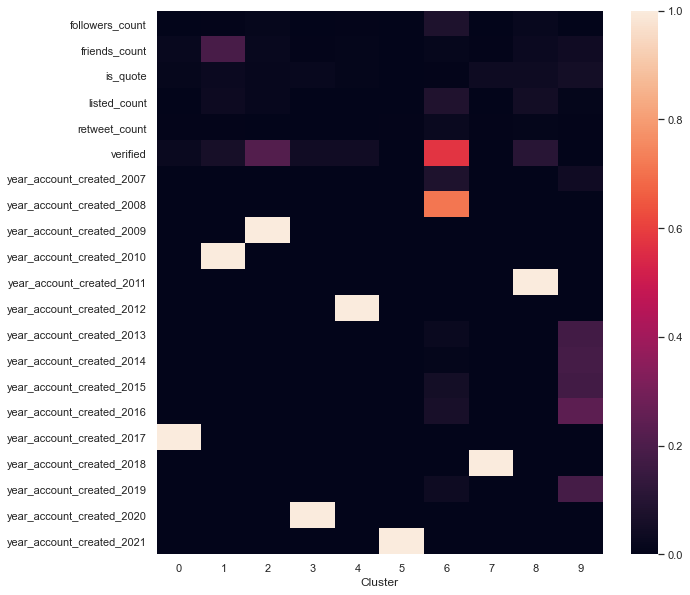

In [100]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cluster_summary2.transpose(), annot=False)
# the cluster looks better than the previous one on only the tweets

# Word Cloud

In [295]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

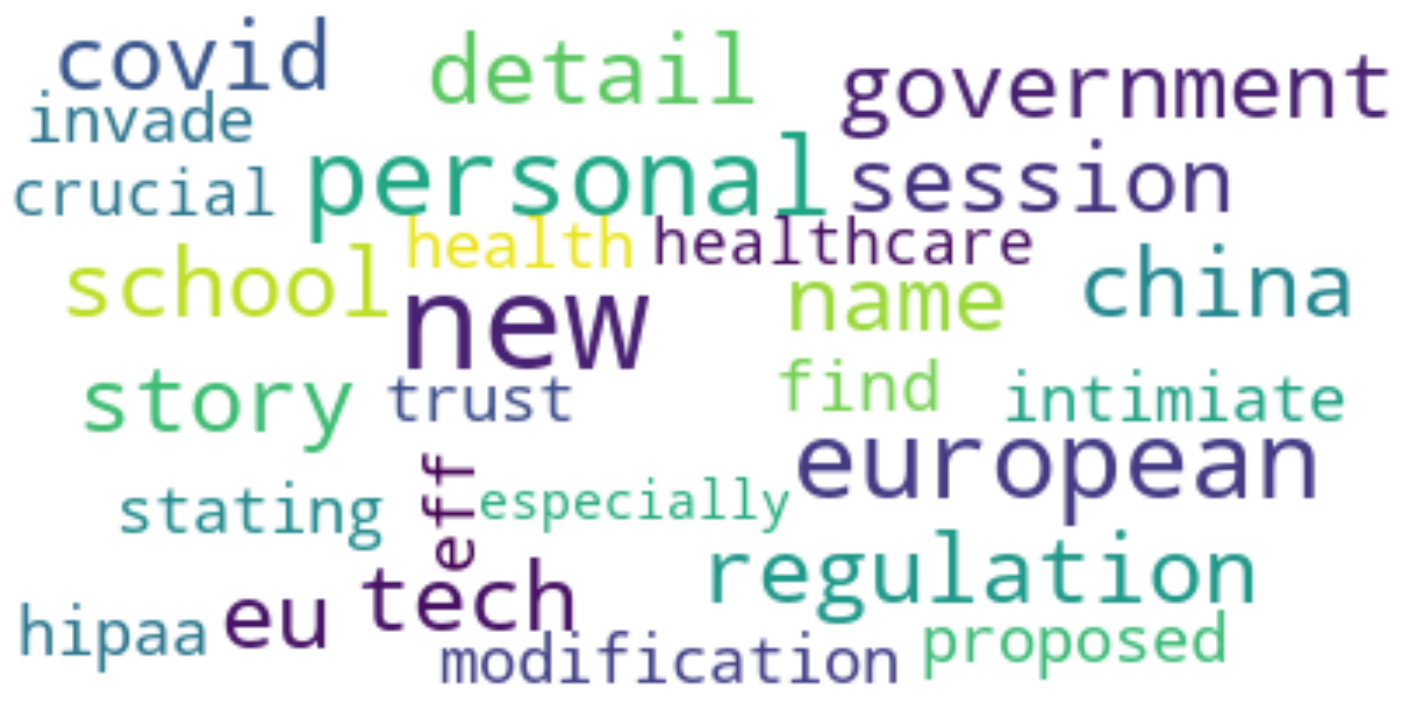

In [297]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(text['text'])
wc = WordCloud(
         background_color="white", max_words=2000,
         min_font_size =15, max_font_size=40, relative_scaling =
         0.5, stopwords=new_stopwords,normalize_plurals= True)
import re
textonly = re.sub("", "",str(text['text']))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#Show the wordcloud
plt.show()

#have to change the code a little; the original one does not cause error but count compound/pos/neg/neutral into the cloud -Shuwen